# Waldyr Faustini - FE630 - Midterm

## Prof. Papa Momar Ndiaye - FE630 Portfolio Theory and Applications

### Question 1 - Data Handling

In [2]:
import numpy as np
import pandas as pd
import glob
import os

#### 1.

In [3]:
# get all txt files in folder
filenames = glob.glob("/Users/waldyrfaustini/FE630 - Midterm/data/*.txt")

In [4]:
filenames

['/Users/waldyrfaustini/FE630 - Midterm/data/DIS.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/GE.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/IBM.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/JPM.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/UNH.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/PFE.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/VZ.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/AA.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/TRV.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/JNJ.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/WMT.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/T.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/UTX.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/BAC.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/CSCO.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/BA.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/MRK.txt',
 '/Users/waldyrfaustini/FE630 - Midterm/data/MMM.txt',
 '/Users/waldyr

###### Test: read one file

In [5]:
file = filenames[0]

In [6]:
#organizing the data names
os.path.split(file)[1]

'DIS.txt'

In [7]:
df = pd.read_csv(file, sep=' ',header=None)
file = file = os.path.split(file)[1]
df.columns = ['Date', 'Opening Price', 'Closing Price', 'High Price', 'Low Price', 'Volume', 'Adjusted Closing Price']
df['Ticker'] = file.split('.txt')[0]

In [8]:
#example using the head
df.head()

,Date,Opening Price,Closing Price,High Price,Low Price,Volume,Adjusted Closing Price,Ticker
0,20130102,50.799999,51.250000,50.639999,51.099998,11674700,49.555106,DIS
1,20130103,51.049999,51.340000,50.840000,51.209999,7566600,49.661781,DIS
2,20130104,51.380001,52.340000,51.330002,52.189999,8745900,50.612153,DIS
3,20130107,51.759998,51.759998,50.660000,50.970001,9472100,49.429039,DIS
4,20130108,50.880001,51.180000,50.570000,50.759998,8637600,49.225385,DIS


In [9]:
#organizing the dataframe
df.pivot_table(index = 'Date', columns = 'Ticker', values = 'Adjusted Closing Price')

Ticker,DIS
Date,
20130102,49.555106
20130103,49.661781
20130104,50.612153
20130107,49.429039
20130108,49.225385
...,...
20150921,103.410004
20150922,102.489998
20150923,101.570000


###### Read everything

In [10]:
def read_file(file):
    df = pd.read_csv(file, sep=' ', header=None)
    file = os.path.split(file)[1]
    df.columns = ['Date', 'Opening Price', 'Closing Price', 'High Price', 'Low Price', 'Volume', 'Adjusted Closing Price']
    df['Ticker'] = file.split('.txt')[0]
    return df

In [11]:
full_df = pd.concat([read_file(file) for file in filenames])

In [12]:
full_df

,Date,Opening Price,Closing Price,High Price,Low Price,Volume,Adjusted Closing Price,Ticker
0,20130102,50.799999,51.250000,50.639999,51.099998,11674700,49.555106,DIS
1,20130103,51.049999,51.340000,50.840000,51.209999,7566600,49.661781,DIS
2,20130104,51.380001,52.340000,51.330002,52.189999,8745900,50.612153,DIS
3,20130107,51.759998,51.759998,50.660000,50.970001,9472100,49.429039,DIS
4,20130108,50.880001,51.180000,50.570000,50.759998,8637600,49.225385,DIS
...,...,...,...,...,...,...,...,...
684,20150921,26.180000,26.700001,26.180000,26.440001,15908700,26.440001,HPQ
685,20150922,25.889999,26.290001,25.379999,25.650000,29603500,25.650000,HPQ
686,20150923,25.650000,25.760000,25.290001,25.490000,11138100,25.490000,HPQ
687,20150924,25.180000,25.330000,24.940001,25.260000,13153700,25.260000,HPQ


#### 2. 

In [102]:
#dataframe as requested

P = full_df.pivot_table(index = 'Date', columns = 'Ticker', values = 'Adjusted Closing Price')
P

Ticker,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MSFT,PFE,PG,T,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
20130102,8.731049,57.020516,72.458451,11.796938,86.985691,18.854991,99.922199,40.236449,49.555106,19.443705,...,25.573933,23.627197,63.736154,30.290674,68.337788,52.191287,79.048064,39.192603,64.682086,81.894545
20130103,8.808744,57.263157,72.834518,11.728294,87.822988,18.956960,99.496766,39.727685,49.661781,19.225032,...,25.231341,23.572484,63.332003,30.307983,68.863028,49.751101,79.339787,39.006689,64.271055,81.746841
20130104,8.993272,57.855200,73.041355,11.875388,88.306756,18.984769,100.021768,40.113643,50.612153,19.316146,...,24.759122,23.672791,63.460595,30.489726,69.463305,49.846793,79.970295,39.219161,64.513935,82.125338
20130107,8.837881,58.097841,71.574694,11.855776,88.576552,18.808642,99.342888,40.175048,49.429039,19.252365,...,24.712826,23.691030,63.028896,30.628198,68.525372,49.846793,79.584462,39.564431,63.897385,81.174472
20130108,8.837881,58.427832,69.694366,11.747906,87.450855,18.827180,98.899354,40.394343,49.225385,19.042804,...,24.583196,23.727506,62.927858,30.111005,68.647308,49.186509,78.624595,38.601629,64.074873,81.682219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150921,9.900000,76.739998,136.020004,15.700000,72.160004,25.540001,78.089996,48.240002,103.410004,25.090000,...,44.110001,32.419998,70.650002,32.560001,100.519997,123.940002,91.550003,44.799999,63.720001,73.389999
20150922,9.500000,75.709999,133.990005,15.570000,71.680000,25.139999,77.250000,48.570000,102.489998,25.110001,...,43.900002,32.259998,70.190002,32.270000,98.980003,122.930000,88.199997,44.430000,63.590000,72.739998
20150923,9.200000,75.629997,131.669998,15.720000,70.199997,25.280001,76.120003,47.910000,101.570000,25.139999,...,43.869999,32.619999,70.260002,32.200001,99.080002,123.279999,86.959999,43.980000,63.720001,72.300003


#### 3. 

In [105]:
#simple returns

daily_return = P.pct_change()


In [106]:
#eliminating the first row, because just brings "NaN"
daily_return = daily_return.iloc[1:,:]

In [109]:
daily_return

Ticker,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MSFT,PFE,PG,T,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
20130103,0.008899,0.004255,0.005190,-0.005819,0.009626,0.005408,-0.004258,-0.012644,0.002153,-0.011246,...,-0.013396,-0.002316,-0.006341,0.000571,0.007686,-0.046755,0.003690,-0.004744,-0.006355,-0.001804
20130104,0.020948,0.010339,0.002840,0.012542,0.005508,0.001467,0.005277,0.009715,0.019137,0.004739,...,-0.018716,0.004255,0.002030,0.005997,0.008717,0.001923,0.007947,0.005447,0.003779,0.004630
20130107,-0.017279,0.004194,-0.020080,-0.001651,0.003055,-0.009277,-0.006787,0.001531,-0.023376,-0.003302,...,-0.001870,0.000770,-0.006803,0.004542,-0.013503,0.000000,-0.004825,0.008804,-0.009557,-0.011578
20130108,0.000000,0.005680,-0.026271,-0.009099,-0.012709,0.000986,-0.004465,0.005458,-0.004120,-0.010885,...,-0.005245,0.001540,-0.001603,-0.016886,0.001779,-0.013246,-0.012061,-0.024335,0.002778,0.006255
20130109,-0.002198,0.000997,0.035478,-0.045910,0.004681,-0.000492,0.002563,0.008469,0.000394,0.002392,...,0.005650,0.017294,0.005401,-0.003202,0.010247,0.018872,0.011969,-0.002320,-0.000292,-0.003843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150921,-0.007021,0.010402,-0.000514,0.008997,0.004175,0.000000,0.004502,0.014938,0.005543,0.011694,...,0.014489,-0.013090,0.010152,0.000307,0.008629,0.012003,0.005271,0.005160,0.005999,0.009769
20150922,-0.040404,-0.013422,-0.014924,-0.008280,-0.006652,-0.015662,-0.010757,0.006841,-0.008897,0.000797,...,-0.004761,-0.004935,-0.006511,-0.008907,-0.015320,-0.008149,-0.036592,-0.008259,-0.002040,-0.008857
20150923,-0.031579,-0.001057,-0.017315,0.009634,-0.020647,0.005569,-0.014628,-0.013589,-0.008976,0.001195,...,-0.000683,0.011159,0.000997,-0.002169,0.001010,0.002847,-0.014059,-0.010128,0.002044,-0.006049


#### 4. 

In [115]:
mu = daily_return.mean()

In [116]:
#vector with mean of returns for each asset

mu

Ticker
AA      0.000225
AXP     0.000473
BA      0.000945
BAC     0.000540
CAT    -0.000340
CSCO    0.000563
CVX    -0.000295
DD      0.000339
DIS     0.001099
GE      0.000425
HD      0.001033
HPQ     0.001010
IBM    -0.000270
INTC    0.000669
JNJ     0.000521
JPM     0.000637
KO      0.000240
MCD     0.000290
MMM     0.000705
MRK     0.000468
MSFT    0.000901
PFE     0.000491
PG      0.000233
T       0.000139
TRV     0.000595
UNH     0.001255
UTX     0.000200
VZ      0.000226
WMT     0.000022
XOM    -0.000107
dtype: float64

#### 5. 

In [117]:
Q = daily_return.cov()

In [118]:
#covariance matrix

Q

Ticker,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MSFT,PFE,PG,T,TRV,UNH,UTX,VZ,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AA,0.000342,0.000079,0.000080,0.000097,0.000104,0.000069,0.000100,0.000084,0.000075,0.000076,...,0.000076,0.000055,0.000037,0.000052,0.000054,0.000072,0.000073,0.000050,0.000044,0.000089
AXP,0.000079,0.000144,0.000066,0.000088,0.000062,0.000051,0.000056,0.000060,0.000071,0.000063,...,0.000063,0.000055,0.000043,0.000043,0.000055,0.000052,0.000068,0.000052,0.000041,0.000053
BA,0.000080,0.000066,0.000169,0.000076,0.000058,0.000056,0.000050,0.000058,0.000066,0.000062,...,0.000056,0.000046,0.000037,0.000034,0.000049,0.000062,0.000078,0.000041,0.000039,0.000049
BAC,0.000097,0.000088,0.000076,0.000215,0.000075,0.000073,0.000074,0.000073,0.000080,0.000074,...,0.000071,0.000055,0.000039,0.000040,0.000069,0.000079,0.000072,0.000040,0.000041,0.000066
CAT,0.000104,0.000062,0.000058,0.000075,0.000166,0.000059,0.000077,0.000061,0.000055,0.000077,...,0.000071,0.000043,0.000030,0.000043,0.000047,0.000053,0.000068,0.000040,0.000031,0.000072
CSCO,0.000069,0.000051,0.000056,0.000073,0.000059,0.000190,0.000054,0.000058,0.000059,0.000062,...,0.000077,0.000048,0.000039,0.000040,0.000045,0.000058,0.000059,0.000034,0.000034,0.000051
CVX,0.000100,0.000056,0.000050,0.000074,0.000077,0.000054,0.000141,0.000060,0.000053,0.000068,...,0.000062,0.000050,0.000043,0.000038,0.000049,0.000059,0.000057,0.000039,0.000030,0.000101
DD,0.000084,0.000060,0.000058,0.000073,0.000061,0.000058,0.000060,0.000132,0.000064,0.000062,...,0.000065,0.000048,0.000036,0.000038,0.000053,0.000053,0.000059,0.000044,0.000038,0.000059
DIS,0.000075,0.000071,0.000066,0.000080,0.000055,0.000059,0.000053,0.000064,0.000148,0.000058,...,0.000067,0.000058,0.000045,0.000043,0.000059,0.000063,0.000068,0.000044,0.000042,0.000054


#### 6. 

Save as `pickle`: to do that, create dictionary with the variables

In [119]:
#dictionary to save the data

save_dict = {'mu': mu, 'Q': Q}

In [120]:
#saving data

import pickle

with open('inputs.pickle', 'wb') as handle:
    pickle.dump(save_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Question 2 - Allocation Model

Function:

$$\boxed{U(h) = -\frac{1}{2}h^{T}Qh + \tau h^{T}\mu}$$

Constraints:

$$0\leq h_{i}\leq 0.1$$ for all $i$, and

$$\sum_{i=1}^{n} h_{i} = h^{T}e = 1$$

In [121]:
import cvxpy as cvx

def port(Q,tau,mu):
    
    h = cvx.Variable(len(mu))
    
    U = cvx.quad_form(h,Q)-tau*h@mu  # we minimize the negative of the original objective function, which was to maximize
    objective = cvx.Minimize(U)
    constraints = [h >= 0, h <= 0.1, sum(h) == 1] #restrictions
    problem = cvx.Problem(objective,constraints)
    min_values = problem.solve()
    h_values = h.value
    return h_values

### Question 3 - Efficient Frontier

#### 1.

In [122]:
#reading the file

with open('inputs.pickle', 'rb') as handle:
    load_dict = pickle.load(handle)

In [123]:
#reading the required data
mu = load_dict['mu']
Q = load_dict['Q']

#### 2.

In [124]:
#creating tau
tau = np.arange(0.0, 0.501, 0.001)

In [125]:
tau

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

#### 3.

Returns and standard deviations are stored in the variables `vec_ret` and `vec_std` below

In [126]:
vec_ret = []
vec_std = []
for t in tau:
    h = port(Q,t,mu)
    exp_return = mu@h   
    var = h@Q@h         
    if var < 0:
        pass
    else:
        std = np.sqrt(var)
    vec_ret.append(exp_return)
    vec_std.append(std)

#### 4.

In [127]:
import matplotlib.pyplot as plt

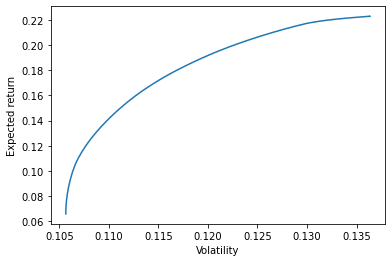

In [128]:
# 1)np.sqrt(252) for std is to normalize my std
# 2)252*np.array(vec_ret) = to annualize my returns

plt.plot(np.sqrt(252)*np.array(vec_std), 252*np.array(vec_ret))
plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.show()

### Question 4 - Time Series Model:   using  the  Sample  Mean  and  the Sample Covariance

#### 1. 

In [129]:
#reading the data

dow_jones = pd.read_csv("/Users/waldyrfaustini/FE630 - Midterm/Midtermdata/data.tsv", sep = '\t')

In [130]:
dow_jones.head()

,^DJI,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
20141029,16974.31,105.54,87.13,120.07,96.58,23.38,112.38,61.77,87.90,24.76,...,90.94,28.52,83.80,97.18,91.52,103.46,53.28,47.51,74.53,91.59
20141030,17195.42,105.18,87.52,120.80,96.55,23.36,112.44,62.57,88.57,24.76,...,91.98,28.86,84.19,97.75,92.42,103.94,58.74,47.58,74.59,91.45
20141031,17390.52,106.18,88.72,121.86,97.75,23.74,115.08,63.95,89.71,24.90,...,91.95,28.97,84.50,98.53,93.54,104.59,59.93,47.91,74.41,93.64
20141103,17366.24,107.56,89.61,122.95,96.61,23.85,112.04,63.70,90.04,24.79,...,92.43,29.20,84.61,97.70,93.39,103.90,59.96,48.05,74.42,92.24
20141104,17383.84,106.77,90.13,122.77,95.05,24.14,110.69,63.36,88.70,24.79,...,92.92,29.28,85.83,98.85,93.51,104.47,60.31,47.99,75.38,91.52


In [132]:
#Dow Jones data
dow_jones

,^DJI,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
20141029,16974.31,105.54,87.13,120.07,96.58,23.38,112.38,61.77,87.90,24.76,...,90.94,28.52,83.80,97.18,91.52,103.46,53.28,47.51,74.53,91.59
20141030,17195.42,105.18,87.52,120.80,96.55,23.36,112.44,62.57,88.57,24.76,...,91.98,28.86,84.19,97.75,92.42,103.94,58.74,47.58,74.59,91.45
20141031,17390.52,106.18,88.72,121.86,97.75,23.74,115.08,63.95,89.71,24.90,...,91.95,28.97,84.50,98.53,93.54,104.59,59.93,47.91,74.41,93.64
20141103,17366.24,107.56,89.61,122.95,96.61,23.85,112.04,63.70,90.04,24.79,...,92.43,29.20,84.61,97.70,93.39,103.90,59.96,48.05,74.42,92.24
20141104,17383.84,106.77,90.13,122.77,95.05,24.14,110.69,63.36,88.70,24.79,...,92.92,29.28,85.83,98.85,93.51,104.47,60.31,47.99,75.38,91.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20151020,17217.11,113.77,76.95,138.88,69.49,28.50,89.99,57.19,109.84,28.78,...,132.37,34.00,73.77,108.95,120.42,95.62,76.28,45.24,58.75,80.83
20151021,17168.61,113.76,76.51,141.19,68.90,28.28,89.33,57.28,110.09,28.85,...,132.47,33.46,73.59,110.70,118.11,97.97,75.46,44.86,58.64,80.21
20151022,17489.16,115.50,72.50,146.31,70.88,29.01,91.62,59.19,113.25,29.58,...,132.41,33.33,74.85,112.32,113.81,99.79,76.42,45.89,58.90,82.89
20151023,17646.70,119.08,74.59,146.70,71.75,29.35,91.24,60.27,113.09,29.51,...,130.53,34.05,77.03,112.28,115.92,100.62,77.07,46.16,58.30,82.98


#### 2. 

In [133]:
#simple return

dow_jones_return = dow_jones.pct_change()

In [134]:
#eliminating the first row, because just brings "NaN"
dow_jones_return = dow_jones_return.iloc[1:,:]
#printing the dataframe
dow_jones_return

,^DJI,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
20141030,0.013026,-0.003411,0.004476,0.006080,-0.000311,-0.000855,0.000534,0.012951,0.007622,0.000000,...,0.011436,0.011921,0.004654,0.005865,0.009834,0.004639,0.102477,0.001473,0.000805,-0.001529
20141031,0.011346,0.009508,0.013711,0.008775,0.012429,0.016267,0.023479,0.022055,0.012871,0.005654,...,-0.000326,0.003812,0.003682,0.007980,0.012119,0.006254,0.020259,0.006936,-0.002413,0.023948
20141103,-0.001396,0.012997,0.010032,0.008945,-0.011662,0.004634,-0.026416,-0.003909,0.003679,-0.004418,...,0.005220,0.007939,0.001302,-0.008424,-0.001604,-0.006597,0.000501,0.002922,0.000134,-0.014951
20141104,0.001013,-0.007345,0.005803,-0.001464,-0.016147,0.012159,-0.012049,-0.005338,-0.014882,0.000000,...,0.005301,0.002740,0.014419,0.011771,0.001285,0.005486,0.005837,-0.001249,0.012900,-0.007806
20141105,0.005792,0.002435,0.011317,-0.007168,0.008206,0.010771,0.014545,0.018939,0.007215,0.004841,...,0.007749,0.000683,0.004078,0.003541,0.008555,0.009859,0.027027,0.000208,0.005704,0.005791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20151020,-0.000779,0.018258,-0.000649,0.003323,0.014453,0.008850,-0.000444,0.002454,0.003380,-0.007244,...,-0.006306,-0.014493,-0.009666,0.024737,-0.002568,0.038783,-0.009222,0.012081,-0.001699,-0.001976
20151021,-0.002817,-0.000088,-0.005718,0.016633,-0.008490,-0.007719,-0.007334,0.001574,0.002276,0.002432,...,0.000755,-0.015882,-0.002440,0.016062,-0.019183,0.024576,-0.010750,-0.008400,-0.001872,-0.007670
20151022,0.018671,0.015295,-0.052411,0.036263,0.028737,0.025813,0.025635,0.033345,0.028704,0.025303,...,-0.000453,-0.003885,0.017122,0.014634,-0.036407,0.018577,0.012722,0.022960,0.004434,0.033412
20151023,0.009008,0.030996,0.028828,0.002666,0.012274,0.011720,-0.004148,0.018246,-0.001413,-0.002366,...,-0.014198,0.021602,0.029125,-0.000356,0.018540,0.008317,0.008506,0.005884,-0.010187,0.001086


#### 3. 

In [135]:
#annualizing the return

dow_jones_anual = dow_jones_return*252

In [136]:
dow_jones_anual 

,^DJI,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
20141030,3.282591,-0.859579,1.127970,1.532106,-0.078277,-0.215569,0.134544,3.263720,1.920819,0.000000,...,2.881900,3.004208,1.172792,1.478082,2.478147,1.169147,25.824324,0.371290,0.202871,-0.385195
20141031,2.859203,2.395893,3.455210,2.211258,3.132056,4.099315,5.916756,5.557935,3.243536,1.424879,...,-0.082192,0.960499,0.927901,2.010844,3.053884,1.575909,5.105209,1.747793,-0.608124,6.034773
20141103,-0.351833,3.275193,2.527953,2.254062,-2.938926,1.167650,-6.656934,-0.985145,0.926987,-1.113253,...,1.315498,2.000690,0.328047,-2.122805,-0.404105,-1.662492,0.126147,0.736381,0.033866,-3.767621
20141104,0.255392,-1.850874,1.462337,-0.368930,-4.069144,3.064151,-3.036416,-1.345055,-3.750333,0.000000,...,1.335930,0.690411,3.633613,2.966223,0.323803,1.382483,1.470981,-0.314672,3.250739,-1.967042
20141105,1.459625,0.613656,2.851881,-1.806304,2.067964,2.714167,3.665372,4.772727,1.818264,1.219847,...,1.952647,0.172131,1.027613,0.892261,2.155919,2.484541,6.810811,0.052511,1.437517,1.459353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20151020,-0.196416,4.601092,-0.163636,0.837451,3.642044,2.230088,-0.111963,0.618405,0.851740,-1.825457,...,-1.589070,-3.652174,-2.435763,6.233634,-0.647064,9.773384,-2.323938,3.044295,-0.428207,-0.497839
20151021,-0.709875,-0.022150,-1.440936,4.191532,-2.139588,-1.945263,-1.848205,0.396573,0.573562,0.612926,...,0.190375,-4.002353,-0.614884,4.047728,-4.834081,6.193265,-2.708967,-2.116711,-0.471830,-1.932946
20151022,4.705017,3.854430,-13.207685,9.138324,7.241800,6.504950,6.460092,8.402933,7.233355,6.376430,...,-0.114139,-0.979079,4.314717,3.687805,-9.174498,4.681433,3.205937,5.786001,1.117326,8.419898
20151023,2.269982,7.810909,7.264552,0.671724,3.093115,2.953464,-1.045187,4.598074,-0.356026,-0.596349,...,-3.577977,5.443744,7.339479,-0.089744,4.671997,2.096002,2.143418,1.482676,-2.567063,0.273616


#### 4.

In [137]:
index_return_anual = dow_jones_anual[['^DJI']]

In [138]:
#separated vector with Index as requested

index_return_anual

,^DJI
20141030,3.282591
20141031,2.859203
20141103,-0.351833
20141104,0.255392
20141105,1.459625
...,...
20151020,-0.196416
20151021,-0.709875
20151022,4.705017
20151023,2.269982


In [139]:
dow_jones_anual = dow_jones_anual.drop('^DJI', axis=1)

In [140]:
#data frame with all assets without index

dow_jones_anual

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
20141030,-0.859579,1.127970,1.532106,-0.078277,-0.215569,0.134544,3.263720,1.920819,0.000000,1.207186,...,2.881900,3.004208,1.172792,1.478082,2.478147,1.169147,25.824324,0.371290,0.202871,-0.385195
20141031,2.395893,3.455210,2.211258,3.132056,4.099315,5.916756,5.557935,3.243536,1.424879,4.068480,...,-0.082192,0.960499,0.927901,2.010844,3.053884,1.575909,5.105209,1.747793,-0.608124,6.034773
20141103,3.275193,2.527953,2.254062,-2.938926,1.167650,-6.656934,-0.985145,0.926987,-1.113253,1.115163,...,1.315498,2.000690,0.328047,-2.122805,-0.404105,-1.662492,0.126147,0.736381,0.033866,-3.767621
20141104,-1.850874,1.462337,-0.368930,-4.069144,3.064151,-3.036416,-1.345055,-3.750333,0.000000,-0.735708,...,1.335930,0.690411,3.633613,2.966223,0.323803,1.382483,1.470981,-0.314672,3.250739,-1.967042
20141105,0.613656,2.851881,-1.806304,2.067964,2.714167,3.665372,4.772727,1.818264,1.219847,-0.576874,...,1.952647,0.172131,1.027613,0.892261,2.155919,2.484541,6.810811,0.052511,1.437517,1.459353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20151020,4.601092,-0.163636,0.837451,3.642044,2.230088,-0.111963,0.618405,0.851740,-1.825457,-0.312049,...,-1.589070,-3.652174,-2.435763,6.233634,-0.647064,9.773384,-2.323938,3.044295,-0.428207,-0.497839
20151021,-0.022150,-1.440936,4.191532,-2.139588,-1.945263,-1.848205,0.396573,0.573562,0.612926,-7.892405,...,0.190375,-4.002353,-0.614884,4.047728,-4.834081,6.193265,-2.708967,-2.116711,-0.471830,-1.932946
20151022,3.854430,-13.207685,9.138324,7.241800,6.504950,6.460092,8.402933,7.233355,6.376430,5.413022,...,-0.114139,-0.979079,4.314717,3.687805,-9.174498,4.681433,3.205937,5.786001,1.117326,8.419898
20151023,7.810909,7.264552,0.671724,3.093115,2.953464,-1.045187,4.598074,-0.356026,-0.596349,2.663325,...,-3.577977,5.443744,7.339479,-0.089744,4.671997,2.096002,2.143418,1.482676,-2.567063,0.273616


#### 5.

In [141]:
Qts= dow_jones_anual.cov()

In [142]:
#covariance matrix

Qts

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
AAPL,17.189758,5.163950,8.117157,7.504042,7.760136,5.749718,6.395502,5.803977,6.435895,7.092305,...,6.239094,5.199586,4.521560,4.736512,7.085481,5.935080,6.234735,4.520417,4.878846,5.864956
AXP,5.163950,11.801005,3.709621,5.023068,3.464257,4.267319,4.262013,4.100070,5.104498,6.164554,...,4.875137,4.528996,3.842933,4.200445,5.726216,4.608220,6.011435,4.046447,3.509210,3.484391
BA,8.117157,3.709621,11.578327,5.912234,6.436918,5.088507,5.292388,5.142882,5.860775,6.103578,...,5.771296,4.211307,3.951963,4.873973,5.495761,6.033398,5.452918,4.121900,5.328031,4.738707
CAT,7.504042,5.023068,5.912234,15.586600,6.221941,10.180008,7.189573,4.093393,8.207462,7.003930,...,4.362807,4.042409,3.797098,4.019818,4.503392,5.831677,5.687167,4.223546,2.880183,8.315665
CSCO,7.760136,3.464257,6.436918,6.221941,12.601319,6.605386,6.610962,5.378391,6.416051,6.645179,...,6.029496,5.314021,4.868431,5.123564,5.275225,5.952877,6.353332,4.353866,4.976422,6.271119
CVX,5.749718,4.267319,5.088507,10.180008,6.605386,17.801898,7.778009,4.759383,8.040405,7.179177,...,5.045841,5.260675,4.658348,4.921555,5.274638,5.723080,6.094311,4.562189,2.951339,12.726488
DD,6.395502,4.262013,5.292388,7.189573,6.610962,7.778009,13.996474,5.255851,6.853092,6.371038,...,4.694718,4.497263,4.380442,4.712879,4.420141,5.446180,5.851856,4.595417,3.745584,6.785087
DIS,5.803977,4.100070,5.142882,4.093393,5.378391,4.759383,5.255851,11.528287,4.740004,5.823145,...,5.023684,4.777729,3.531746,4.789867,5.052080,4.738550,6.018123,3.732982,3.469188,4.643487
GE,6.435895,5.104498,5.860775,8.207462,6.416051,8.040405,6.853092,4.740004,12.737560,6.927707,...,4.972173,5.522729,4.337797,4.862115,5.474648,6.153092,5.890143,4.612518,4.093615,7.113981
GS,7.092305,6.164554,6.103578,7.003930,6.645179,7.179177,6.371038,5.823145,6.927707,10.683242,...,6.523232,5.647448,4.649405,5.735942,6.634266,5.782208,7.220981,4.802528,4.573249,6.733576


#### 6.

In [143]:
Qts.head(5)

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
AAPL,17.189758,5.163950,8.117157,7.504042,7.760136,5.749718,6.395502,5.803977,6.435895,7.092305,...,6.239094,5.199586,4.521560,4.736512,7.085481,5.935080,6.234735,4.520417,4.878846,5.864956
AXP,5.163950,11.801005,3.709621,5.023068,3.464257,4.267319,4.262013,4.100070,5.104498,6.164554,...,4.875137,4.528996,3.842933,4.200445,5.726216,4.608220,6.011435,4.046447,3.509210,3.484391
BA,8.117157,3.709621,11.578327,5.912234,6.436918,5.088507,5.292388,5.142882,5.860775,6.103578,...,5.771296,4.211307,3.951963,4.873973,5.495761,6.033398,5.452918,4.121900,5.328031,4.738707
CAT,7.504042,5.023068,5.912234,15.586600,6.221941,10.180008,7.189573,4.093393,8.207462,7.003930,...,4.362807,4.042409,3.797098,4.019818,4.503392,5.831677,5.687167,4.223546,2.880183,8.315665
CSCO,7.760136,3.464257,6.436918,6.221941,12.601319,6.605386,6.610962,5.378391,6.416051,6.645179,...,6.029496,5.314021,4.868431,5.123564,5.275225,5.952877,6.353332,4.353866,4.976422,6.271119


In [144]:
#First 5 rows and 5 lines as requested

Qts[['AAPL','AXP','BA','CAT','CSCO']].head(5)

,AAPL,AXP,BA,CAT,CSCO
AAPL,17.189758,5.163950,8.117157,7.504042,7.760136
AXP,5.163950,11.801005,3.709621,5.023068,3.464257
BA,8.117157,3.709621,11.578327,5.912234,6.436918
CAT,7.504042,5.023068,5.912234,15.586600,6.221941
CSCO,7.760136,3.464257,6.436918,6.221941,12.601319


### Question 5 - Single Index Model

#### 1.

In [65]:
#Dow Jones annualized returns (got this result in the Question 4)

dow_jones_anual

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
20141030,-0.859579,1.127970,1.532106,-0.078277,-0.215569,0.134544,3.263720,1.920819,0.000000,1.207186,...,2.881900,3.004208,1.172792,1.478082,2.478147,1.169147,25.824324,0.371290,0.202871,-0.385195
20141031,2.395893,3.455210,2.211258,3.132056,4.099315,5.916756,5.557935,3.243536,1.424879,4.068480,...,-0.082192,0.960499,0.927901,2.010844,3.053884,1.575909,5.105209,1.747793,-0.608124,6.034773
20141103,3.275193,2.527953,2.254062,-2.938926,1.167650,-6.656934,-0.985145,0.926987,-1.113253,1.115163,...,1.315498,2.000690,0.328047,-2.122805,-0.404105,-1.662492,0.126147,0.736381,0.033866,-3.767621
20141104,-1.850874,1.462337,-0.368930,-4.069144,3.064151,-3.036416,-1.345055,-3.750333,0.000000,-0.735708,...,1.335930,0.690411,3.633613,2.966223,0.323803,1.382483,1.470981,-0.314672,3.250739,-1.967042
20141105,0.613656,2.851881,-1.806304,2.067964,2.714167,3.665372,4.772727,1.818264,1.219847,-0.576874,...,1.952647,0.172131,1.027613,0.892261,2.155919,2.484541,6.810811,0.052511,1.437517,1.459353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20151020,4.601092,-0.163636,0.837451,3.642044,2.230088,-0.111963,0.618405,0.851740,-1.825457,-0.312049,...,-1.589070,-3.652174,-2.435763,6.233634,-0.647064,9.773384,-2.323938,3.044295,-0.428207,-0.497839
20151021,-0.022150,-1.440936,4.191532,-2.139588,-1.945263,-1.848205,0.396573,0.573562,0.612926,-7.892405,...,0.190375,-4.002353,-0.614884,4.047728,-4.834081,6.193265,-2.708967,-2.116711,-0.471830,-1.932946
20151022,3.854430,-13.207685,9.138324,7.241800,6.504950,6.460092,8.402933,7.233355,6.376430,5.413022,...,-0.114139,-0.979079,4.314717,3.687805,-9.174498,4.681433,3.205937,5.786001,1.117326,8.419898
20151023,7.810909,7.264552,0.671724,3.093115,2.953464,-1.045187,4.598074,-0.356026,-0.596349,2.663325,...,-3.577977,5.443744,7.339479,-0.089744,4.671997,2.096002,2.143418,1.482676,-2.567063,0.273616


In [66]:
#Index annualized returns (got this in Question 4.4)

index_return_anual

,^DJI
20141030,3.282591
20141031,2.859203
20141103,-0.351833
20141104,0.255392
20141105,1.459625
...,...
20151020,-0.196416
20151021,-0.709875
20151022,4.705017
20151023,2.269982


In [67]:
import matplotlib.pyplot as plt

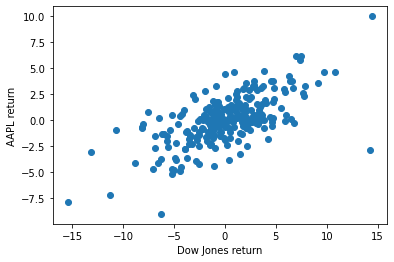

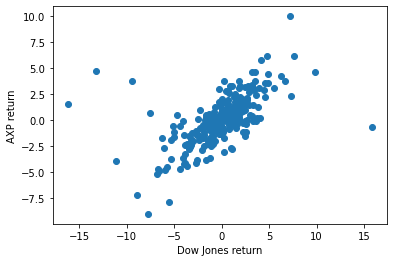

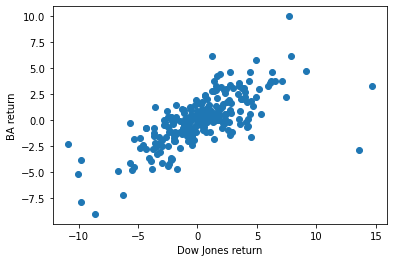

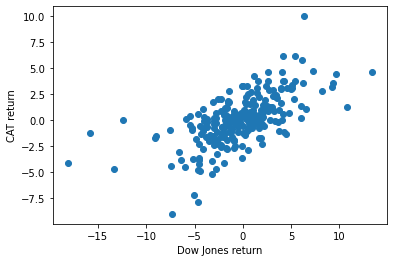

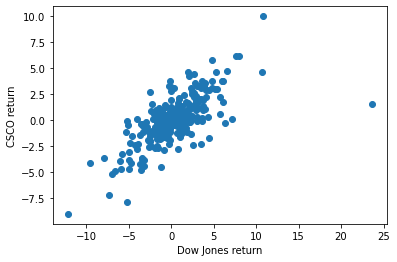

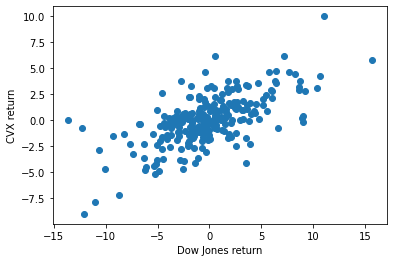

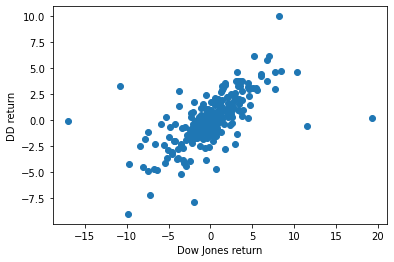

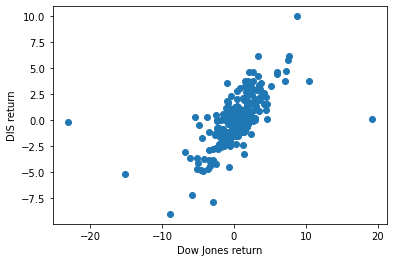

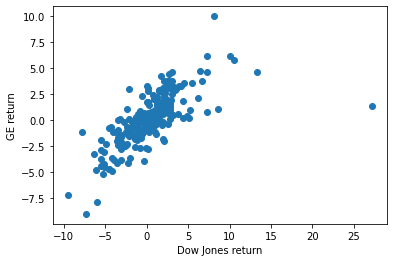

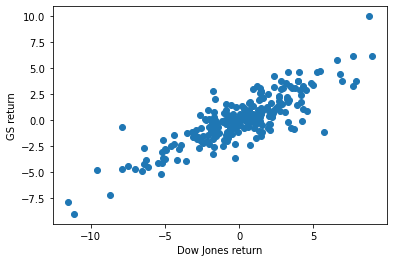

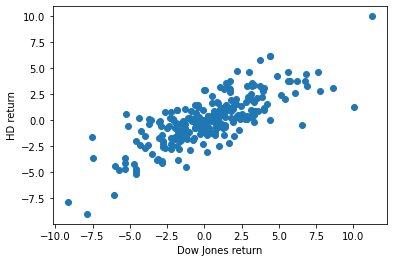

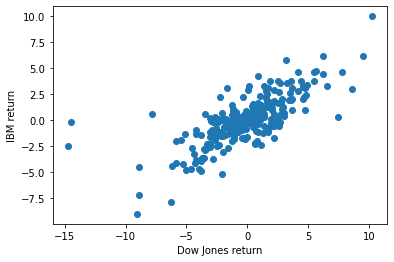

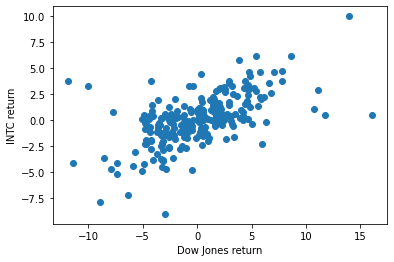

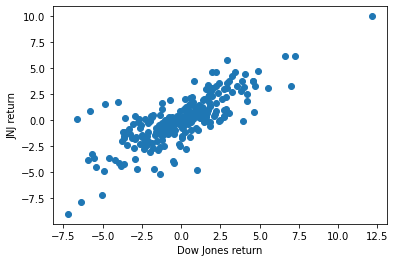

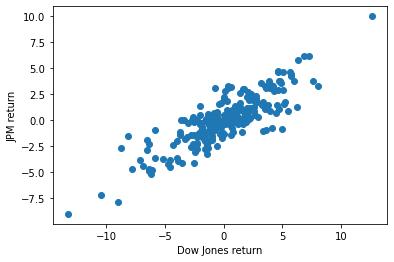

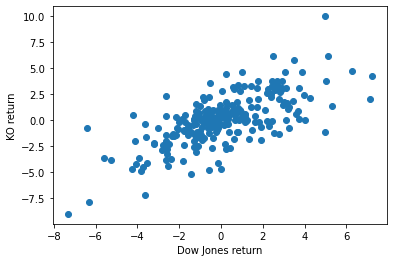

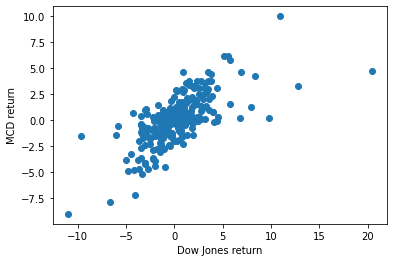

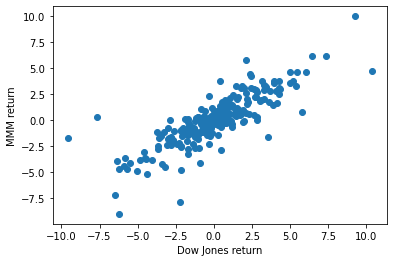

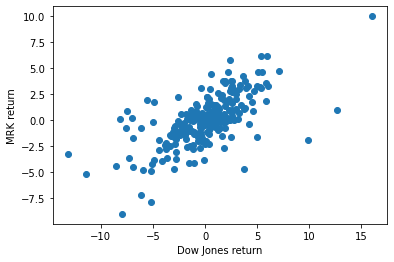

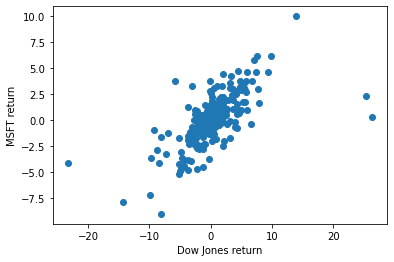

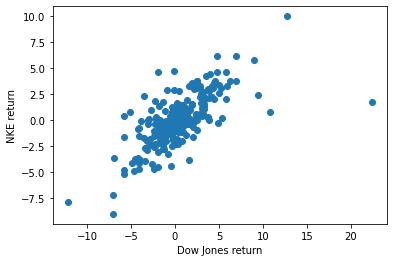

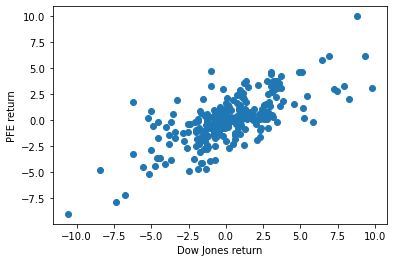

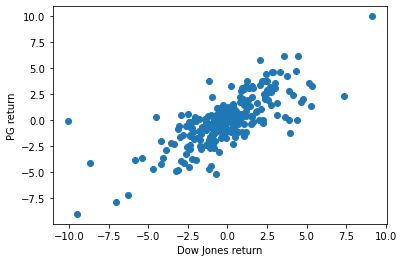

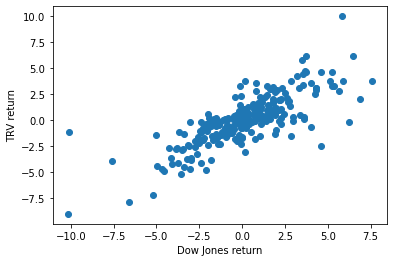

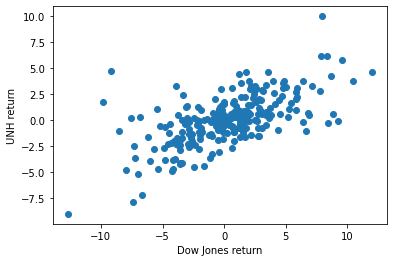

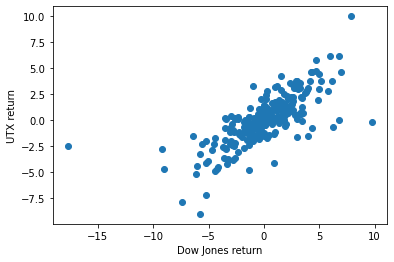

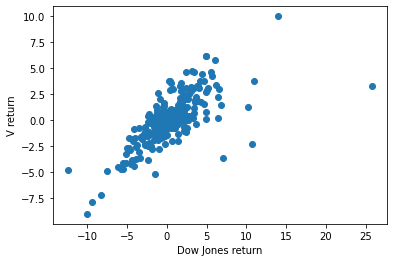

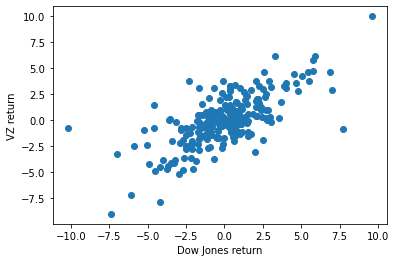

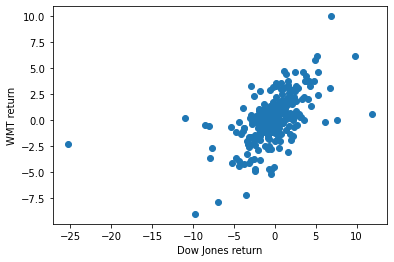

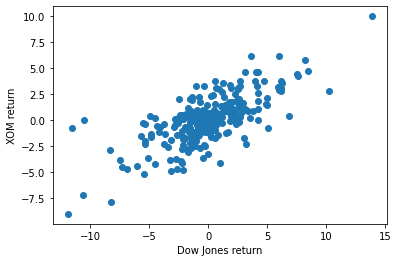

In [68]:
#using a loop to regress each company into the index return and plotting the results

for ind, col in enumerate(dow_jones_anual.columns):
    
    index_dji = index_return_anual
    stocks_dow = dow_jones_anual.iloc[:,ind]
    
    index_return_anual = index_return_anual.reset_index(drop=True)
    dow_jones_anual = dow_jones_anual.reset_index(drop=True)
        
    plt.scatter(stocks_dow[:],index_dji[:])

    plt.xlabel('Dow Jones return')
    plt.ylabel(f"{col} return")
    plt.show()



#### 2.

To get the $\beta_i$s and intercepts we need to use linear regression.

In [69]:
import scipy.stats # for linear regression

In [70]:
total_n = len(index_return_anual)

In [71]:
regression_stats = {}
for ticker in dow_jones_anual.columns:
    regression = scipy.stats.linregress(x=index_return_anual['^DJI'], y=dow_jones_anual[ticker])
    slope, inter = regression.slope, regression.intercept
    idio_std = np.sqrt(((dow_jones_anual[ticker] - (slope*index_return_anual['^DJI'] + inter))**2).sum()/(total_n-2))
    regression_stats[ticker] = [inter, slope, idio_std]

In [72]:
table = pd.DataFrame(regression_stats)
table.index = ['intercept', 'slope', 'idio_std']

In [145]:
#Table for all 30 companies as requested

table.T

,intercept,slope,idio_std
AAPL,0.067444,1.138782,3.149988
AXP,-0.181125,0.853526,2.779780
BA,0.175567,1.019695,2.396362
CAT,-0.325051,1.063530,3.041449
CSCO,0.188962,1.060068,2.508910
CVX,-0.259788,1.148306,3.227044
DD,-0.045663,1.020580,2.856619
DIS,0.236935,0.917125,2.610795
GE,0.151463,1.065219,2.523784
GS,-0.017950,1.165276,1.744766


#### 3.

Variance:

In [146]:
index_variance = index_return_anual['^DJI'].std()**2

In [147]:
index_variance

5.634794336638298

#### 4.

* $\sigma_M^2$: index variance
* $\beta$: vector of slopes, obtained via regression
* $\sigma_{r,i}^2$: variance of residues

We calculate the QSI matrix as
$$\Sigma = \sigma_M^2 \beta \beta' + D$$
where $D$ is a diagonal matrix with components $D_{ij} = \delta_{ij} \sigma_{r,i}^2$, and $\beta$ is a vector composed of all the regression coefficients.

In [148]:
# sigma M^2 = index_variance
beta = table.T['slope']
sigma_residues = table.T['idio_std']

In [149]:
D = np.zeros((dow_jones_anual.shape[1], dow_jones_anual.shape[1]))
np.fill_diagonal(D, sigma_residues**2)

In [150]:
beta = beta.values.reshape(30,1)

In [151]:
QSI = index_variance * beta @ beta.T + D

In [152]:
QSI_df = pd.DataFrame(QSI, columns=dow_jones_anual.columns, index=dow_jones_anual.columns)

In [153]:
#printing the matrix Qsi

QSI_df

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
AAPL,17.229767,5.476909,6.543181,6.824462,6.802251,7.368456,6.548862,5.885009,6.835303,7.477348,...,6.301525,5.683205,4.917151,5.605848,6.615963,6.269789,7.176703,4.804551,4.973456,6.745784
AXP,5.476909,11.832163,4.904163,5.114985,5.098338,5.522713,4.908421,4.410858,5.123111,5.604328,...,4.723040,4.259605,3.685442,4.201625,4.958713,4.699253,5.378993,3.601047,3.727642,5.056016
BA,6.543181,4.904163,11.601482,6.110796,6.090908,6.597902,5.864017,5.269586,6.120504,6.695407,...,5.642545,5.088886,4.402942,5.019619,5.924101,5.614128,6.426202,4.302117,4.453358,6.040347
CAT,6.824462,5.114985,6.110796,15.623900,6.352746,6.881536,6.116102,5.496117,6.383615,6.983232,...,5.885110,5.307650,4.592218,5.235405,6.178769,5.855471,6.702455,4.487058,4.644801,6.300012
CSCO,6.802251,5.098338,6.090908,6.352746,12.626701,6.859139,6.096196,5.478229,6.362838,6.960504,...,5.865955,5.290375,4.577271,5.218365,6.158659,5.836413,6.680640,4.472455,4.629684,6.279507
CVX,7.368456,5.522713,6.597902,6.881536,6.859139,17.843889,6.603631,5.934226,6.892468,7.539882,...,6.354225,5.730735,4.958274,5.652731,6.671293,6.322224,7.236723,4.844732,5.015049,6.802200
DD,6.548862,4.908421,5.864017,6.116102,6.096196,6.603631,14.029378,5.274161,6.125818,6.701220,...,5.647444,5.093305,4.406765,5.023977,5.929244,5.619002,6.431781,4.305852,4.457225,6.045591
DIS,5.885009,4.410858,5.269586,5.496117,5.478229,5.934226,5.274161,11.555772,5.504848,6.021923,...,5.074967,4.577000,3.960054,4.514700,5.328201,5.049408,5.779797,3.869371,4.005399,5.432754
GE,6.835303,5.123111,6.120504,6.383615,6.362838,6.892468,6.125818,5.504848,12.763244,6.994326,...,5.894459,5.316081,4.599513,5.243721,6.188584,5.864772,6.713102,4.494187,4.652180,6.310020
GS,7.477348,5.604328,6.695407,6.983232,6.960504,7.539882,6.701220,6.021923,6.994326,10.695517,...,6.448129,5.815425,5.031548,5.736268,6.769882,6.415655,7.343669,4.916329,5.089163,6.902725


#### 5.

In [159]:
#printing the first 5 lines and 5 columns

QSI_df.head(5)[['AAPL','AXP','BA','CAT','CSCO']]

,AAPL,AXP,BA,CAT,CSCO
AAPL,17.229767,5.476909,6.543181,6.824462,6.802251
AXP,5.476909,11.832163,4.904163,5.114985,5.098338
BA,6.543181,4.904163,11.601482,6.110796,6.090908
CAT,6.824462,5.114985,6.110796,15.623900,6.352746
CSCO,6.802251,5.098338,6.090908,6.352746,12.626701


### Question 6 - Time Series vs Single Index Model

##### 6.1

In [160]:
no_dj_matrix = dow_jones_return.drop('^DJI', axis=1)

In [161]:
mu = no_dj_matrix.mean()  # non-annualized
qts = no_dj_matrix.cov()  # non-annualized

vec_ret = []
vec_std = []
for t in tau:
    h = port(qts,t,mu)
    exp_return = mu@h  
    var = h@qts@h         
    if var < 0:
        pass
    else:
        std = np.sqrt(var)
    vec_ret.append(exp_return)
    vec_std.append(std)

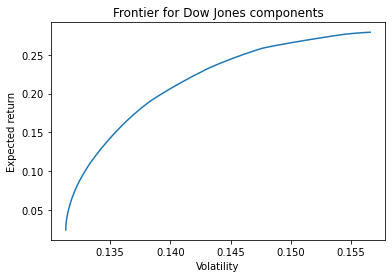

In [162]:
# 1)np.sqrt(252) for std is to normalize my std
# 2)252*np.array() = to annualize my returns

plt.plot(np.sqrt(252)*np.array(vec_std), 252*np.array(vec_ret))
plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.title("Frontier for Dow Jones components")
plt.show()

##### 6.2

In [163]:
qsi = QSI_df/(252**2) # non-annualized version to keep everything in line with what we previously did

In [164]:
mu = no_dj_matrix.mean()  # non-annualized

qsi_ret = []
qsi_std = []
for t in tau:
    h = port(qsi,t,mu)
    exp_return = mu@h   
    var = h@qsi@h         
    if var < 0:
        pass
    else:
        std = np.sqrt(var)
    qsi_ret.append(exp_return)
    qsi_std.append(std)

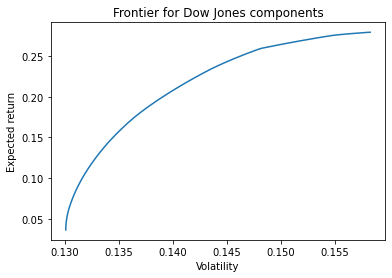

In [165]:
# 1)np.sqrt(252) for std is to normalize my std
# 2)252*np.array() = to annualize my returns

plt.plot(np.sqrt(252)*np.array(qsi_std), 252*np.array(qsi_ret))
plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.title("Frontier for Dow Jones components")
plt.show()

##### 6.3

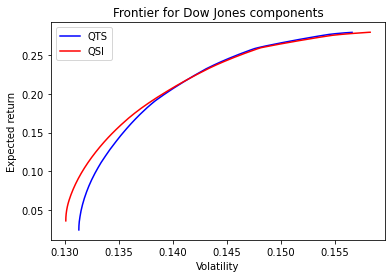

In [166]:
# 1)np.sqrt(252) for std is to normalize my std
# 2)252*np.array() = to annualize my returns

plt.plot(np.sqrt(252)*np.array(vec_std), 252*np.array(vec_ret), color='blue', label='QTS')
plt.plot(np.sqrt(252)*np.array(qsi_std), 252*np.array(qsi_ret), color='red', label='QSI')
plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.title("Frontier for Dow Jones components")
plt.legend()
plt.show()

The QSI model seems to be a good fit for higher volatilities, but the discrepancy increases as we consider lowers vols / lower returns.
Despite these differences (above) I think the model is good enough to be validated.